# Why Mel -spectrogram / MFCC

The main point to understand about speech is that the sounds generated by a human are filtered by the shape of the vocal tract including tongue, teeth etc. 
This shape determines what sound comes out. 
If we can determine the shape accurately, this should give us an accurate representation of the phoneme being produced. 
The shape of the vocal tract manifests itself in the envelope of the short time power spectrum, and the job of MFCCs is to accurately represent this envelope.

## Steps to calculate MFCC

1. Frame the signal into short frames.

2. For each frame calculate the periodogram estimate of the power spectrum.
The next step is to calculate the power spectrum of each frame. 
This is motivated by the human cochlea (an organ in the ear) which vibrates at different spots depending on the frequency of the incoming sounds. 
Depending on the location in the cochlea that vibrates (which wobbles small hairs), different nerves fire informing the brain that certain frequencies are present. 
Our periodogram estimate performs a similar job for us, identifying which frequencies are present in the frame.

3. Apply the mel filterbank to the power spectra, sum the energy in each filter.

we take clumps of periodogram bins and sum them up to get an idea of how much energy exists in various frequency regions. This is performed by our Mel filterbank: the first filter is very narrow and gives an indication of how much energy exists near 0 Hertz.

The Mel scale tells us exactly how to space our filterbanks and how wide to make them.

4. Take the logarithm of all filterbank energies.

Once we have the filterbank energies, we take the logarithm of them. This is also motivated by human hearing: we don't hear loudness on a linear scale. Generally to double the percieved volume of a sound we need to put 8 times as much energy into it. This means that large variations in energy may not sound all that different if the sound is loud to begin with. This compression operation makes our features match more closely what humans actually hear.

5. Take the DCT of the log filterbank energies.

The final step is to compute the DCT of the log filterbank energies. There are 2 main reasons this is performed. Because our filterbanks are all overlapping, the filterbank energies are quite correlated with each other. The DCT decorrelates the energies which means diagonal covariance matrices can be used to model the features in e.g. a HMM classifier.

6. Keep DCT coefficients 2-13, discard the rest.

only 12 of the 26 DCT coefficients are kept. This is because the higher DCT coefficients represent fast changes in the filterbank energies and it turns out that these fast changes actually degrade ASR performance, so we get a small improvement by dropping them.

### What is mel-scale

The Mel scale relates perceived frequency, or pitch, of a pure tone to its actual measured frequency. Humans are much better at discerning small changes in pitch at low frequencies than they are at high frequencies. Incorporating this scale makes our features match more closely what humans hear.

Formula: M(f) = 1125ln (1+f/700)

#### What does it actually means

The MFCC gives 26 values at a particular frame of length 20 to 40 ms. 
But we only keep 12 as at higher frequency produces difficulty in noticing the change in frequency

So these 12 values actually provided information at a particular time period that what all frequencies trigger the ear's cochela and which are the power frequencies of that frame.

Frame are taken between 20 -40ms because we assume that frequencies remains constant for a short period of time (statistically).
Smaller frames than that may lead us to believe that there are no change in frequencies and larger frame size than that will give us too much change in frequency.

In [24]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
song = r"C:\Users\Mahip\Documents\Sound recordings\4stroke.m4a"

In [3]:
y ,sr = librosa.load(song)

In [20]:
mels = librosa.feature.melspectrogram(y)

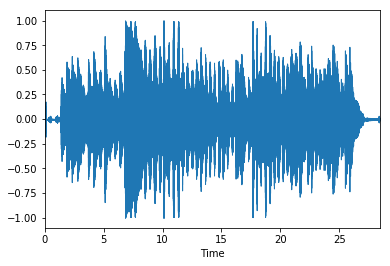

In [21]:
librosa.display.waveplot(y)

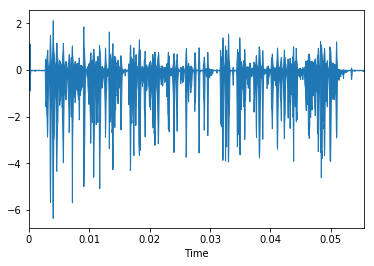

In [22]:
librosa.display.waveplot(mels)

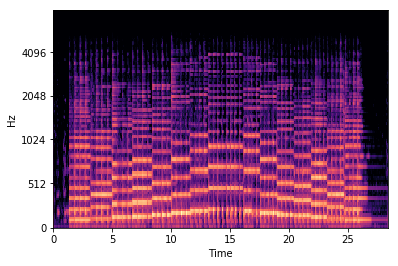

In [25]:
librosa.display.specshow(librosa.power_to_db(mels, ref=np.max),y_axis='mel', fmax=8000,x_axis='time')

In [26]:
mfcc = librosa.feature.mfcc(y)

 ...]

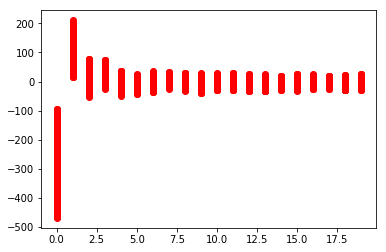

In [31]:
plt.plot(mfcc , 'ro')

In [33]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)


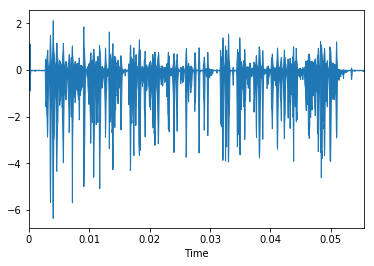

In [37]:
librosa.display.waveplot(S)